## Project Overview
The project is trying to find the best year for game sales by looking at how many games were sold and how much users liked them. It also wants to figure out which game was the most successful during that year.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamedata/game_sales_data.csv


In [2]:
game_sales = pd.read_csv("/kaggle/input/videogamedata/game_sales_data.csv", encoding="ISO-8859-1")

game_sales.head()

,Rank,Name,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,Year
0,1,Wii Sports,Wii,Nintendo,Nintendo EAD,7.7,8.0,82.90,2006
1,2,Super Mario Bros.,NES,Nintendo,Nintendo EAD,10.0,8.2,40.24,1985
2,3,Counter-Strike: Global Offensive,PC,Valve,Valve Corporation,8.0,7.5,40.00,2012
3,4,Mario Kart Wii,Wii,Nintendo,Nintendo EAD,8.2,9.1,37.32,2008
4,5,PLAYERUNKNOWN'S BATTLEGROUNDS,PC,PUBG Corporation,PUBG Corporation,8.6,4.7,36.60,2017


## Data Preprocessing

In [3]:
# counting row
game_sales.shape[0]

19600

In [4]:
game_sales = game_sales.drop_duplicates(subset=["Name"])

In [5]:
# counting row after drop duplicate game name
game_sales.shape[0]

game_sales.to_csv("game_sales.csv")

## Exploratory Data Analysis
1. Checking if there are any pieces of information missing
2. Calculating the mean user score.
3. Determining the average total shipments.

In [6]:
# checking if there missing value
result = game_sales.isnull()
print("Total missing value:")
result.sum()

Total missing value:


Rank                 0
Name                 0
Platform             0
Publisher            0
Developer            2
Critic_Score      7313
User_Score       12213
Total_Shipped        0
Year                 0
dtype: int64

In [7]:
# calculating average of user score
avg_score = game_sales['User_Score'].mean()
print("Average user score: " + str(round(avg_score, 2)))

# calculating median of user_score
median_score = game_sales['User_Score'].median()
print("Median game score : " + str(round(median_score, 2)))

# calculating average of total shipped
avg_sales = game_sales['Total_Shipped'].mean()
print("Average game sales: " + str(round(avg_sales, 2)) + " million units")

# calculating median of total shipped
median_sales = game_sales['Total_Shipped'].median()
print("Median game sales : " + str(round(median_sales, 2)) + " million units")

Average user score: 7.15
Median game score : 7.4
Average game sales: 0.62 million units
Median game sales : 0.16 million units


## Data Analysis
1. Identifying the years with more than 3 games.
2. Identifying the top 25% of years based on ratings.
3. Identifying the top 25% of years based on sales.

### Count the games for each year for years with more than 3 games

In [8]:
# Count the games for each year, but only for years with more than 3 games
count_per_year = game_sales['Year'].value_counts().reset_index().sort_values(by='count', ascending=False)
game_above_3 = count_per_year[count_per_year["count"] >= 4]

game_above_3.head()

,Year,count
0,2009,1121
1,2008,1075
2,2010,984
3,2011,879
4,2007,858


### Years when users really enjoy the game

In [9]:
# find the top 25% of years based on rating
avg_user_score_per_year = game_sales.groupby('Year')['User_Score'].mean().reset_index()
threshold_rating = avg_user_score_per_year["User_Score"].quantile(0.75)
high_user_score = avg_user_score_per_year[avg_user_score_per_year["User_Score"] > threshold_rating].sort_values(by='User_Score', ascending=False)
high_user_score.loc[:, "User_Score"] = high_user_score["User_Score"].round(2)

high_user_score.head()

,Year,User_Score
16,1993,9.50
13,1990,9.30
20,1997,9.25
22,1999,8.93
10,1987,8.80


### Years with significant game sales

In [10]:
# find the top 25% of years based on sales
sum_total_shipped_per_year = game_sales.groupby('Year')['Total_Shipped'].sum().reset_index()
threshold_sales = sum_total_shipped_per_year["Total_Shipped"].quantile(0.75)
high_sales = sum_total_shipped_per_year[sum_total_shipped_per_year["Total_Shipped"] > threshold_sales].sort_values(by='Total_Shipped', ascending=False)
high_sales.loc[:, "Total_Shipped"] = high_sales["Total_Shipped"].round(2)

high_sales.head()

,Year,Total_Shipped
31,2008,516.76
32,2009,500.89
33,2010,492.37
30,2007,473.01
34,2011,447.60


### Years boasting games with over 3 units, impressive ratings, and strong sales

In [11]:
# years with games having more than 30 units sold, high ratings, and high sales.
result = pd.merge(game_above_3, high_user_score, on='Year').merge(high_sales, on='Year')

result

,Year,count,User_Score,Total_Shipped
0,2010,984,8.72,492.37


### Best games at 2010

In [12]:
# best sales games at 1991
filtered_game = game_sales.loc[:, ["Name", "Developer","Total_Shipped", "User_Score"]][game_sales["Year"] == 2010]
sorted_filtered_game = filtered_game.sort_values(by='Total_Shipped', ascending=False)

sorted_filtered_game.head()

,Name,Developer,Total_Shipped,User_Score
5,Minecraft,Mojang AB,33.15,7.8
15,Kinect Adventures!,Good Science Studio,24.00,NaN
48,Call of Duty: Black Ops,Treyarch,14.74,NaN
67,Pokemon Heart Gold / Soul Silver Version,Game Freak,12.72,NaN
78,Gran Turismo 5,Polyphony Digital,11.95,NaN


### Correlation between the number of games and the revenue

In [13]:
# total revenue based on developer and the game
result = game_sales.groupby('Developer').agg(
    Count_Game=pd.NamedAgg(column='Name', aggfunc='count'),
    Game_Sold=pd.NamedAgg(column='Total_Shipped', aggfunc='sum')
).round({'Total_Shipped': 2}).reset_index()

result = result.sort_values(by='Game_Sold', ascending=False)

result.head()

,Developer,Count_Game,Game_Sold
1789,Nintendo EAD,81,669.29
998,Game Freak,24,269.13
462,Capcom,244,175.02
768,EA Canada,107,155.57
1787,Nintendo,68,106.12


## Data Visualization

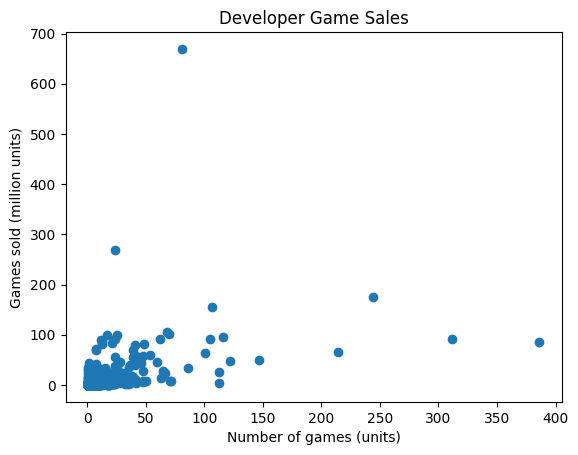

In [14]:
plt.scatter(result["Count_Game"], result["Game_Sold"])

plt.xlabel("Number of games (units)")
plt.ylabel("Games sold (million units)")
plt.title("Developer Game Sales")

plt.savefig("developer_game_sales.png")

plt.show()

## Summary
1. Games typically get an average score of 7.15 out of 10.
2. On average, games sell around 0.62 million copies units.
3. Looking at the visualized data, it seems that the number of games a developer creates doesn't have a clear connection with the revenue they generate.
4. The highest game sales occurred in 2008, reaching a total of 516 million units.
5. The year 2010 was a standout for games because a lot of games did really well in terms of both sales and ratings. Minecraft, which was released that year, was a big part of this success.

## Recommendation
1. To be considered very good, your game should have a minimum rating of 7.15.
2. Achieving a minimum of 620k copies in sales is necessary for a game to be classified as very good.
3. The number of games a developer creates doesn't show any correlation with revenue. Therefore, focusing on creating really good games, marketing them well, and considering other important aspects, rather than just making a lot of games to make more money.